# Simple Reinforcement Learning with Keras: Part 2 - Policy-based Agents

Re-write of code from [Simple Reinforcement Learning with Tensorflow: Part 2 - Policy-based Agents](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-2-ded33892c724#.zh7rnjs25)

https://gym.openai.com/

pip install gym

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import gym
env = gym.make("CartPole-v0")

In [3]:
#     Description:
#         A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
#         The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.
#     Source:
#         This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
#     Observation: 
#         Type: Box(4)
#         Num	Observation                 Min         Max
#         0	Cart Position             -4.8            4.8
#         1	Cart Velocity             -Inf            Inf
#         2	Pole Angle                 -24 deg        24 deg
#         3	Pole Velocity At Tip      -Inf            Inf
        
#     Actions:
#         Type: Discrete(2)
#         Num	Action
#         0	Push cart to the left
#         1	Push cart to the right
        
#         Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
#     Reward:
#         Reward is 1 for every step taken, including the termination step
#     Starting State:
#         All observations are assigned a uniform random value in [-0.05..0.05]
#     Episode Termination:
#         Pole Angle is more than 12 degrees
#         Cart Position is more than 2.4 (center of the cart reaches the edge of the display)
#         Episode length is greater than 200
#         Solved Requirements
#         Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.

In [4]:
env.reset()
(position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole), reward, done, _ = env.step(env.action_space.sample())
print('position_of_cart:', position_of_cart)
print('velocity_of_cart:', velocity_of_cart)
print('angle_of_pole:', angle_of_pole)
print('rotation_rate_of_pole:', rotation_rate_of_pole)
print('reward:', reward)
print('done:', done)

position_of_cart: 0.04358768103743411
velocity_of_cart: -0.1685302619331065
angle_of_pole: 0.00823107953079534
rotation_rate_of_pole: 0.29346056848493074
reward: 1.0
done: False


In [5]:
print(type(env.action_space), env.action_space.n)
print(type(env.observation_space), env.observation_space.shape)

<class 'gym.spaces.discrete.Discrete'> 2
<class 'gym.spaces.box.Box'> (4,)


In [127]:
def get_random_episode():
    done = False
    env.reset()
    positions_of_cart = []
    velocities_of_cart = []
    angles_of_pole = []
    rotation_rates_of_pole = []
    actions = []
    while not done:
        action = env.action_space.sample()
        actions.append(action)
        observation, reward, done, _ = env.step(action)
        (position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole) = observation
        positions_of_cart.append(position_of_cart)
        velocities_of_cart.append(velocity_of_cart)
        angles_of_pole.append(angle_of_pole)
        rotation_rates_of_pole.append(rotation_rate_of_pole)
    return positions_of_cart, velocities_of_cart, angles_of_pole, rotation_rates_of_pole, actions

In [163]:
def plot_episode(positions_of_cart, velocities_of_cart, angles_of_pole, rotation_rates_of_pole, actions, show_pos_thres=False):
    f, ax = plt.subplots(2, 2, figsize=(20,8))
    ax = ax.reshape(-1)
    ax[0].set_title('Positions of Cart')
    ax[0].plot(positions_of_cart, marker='x')
    if show_pos_thres:
        ax[0].hlines(2.4, xmin=0, xmax=len(positions_of_cart))
        ax[0].hlines(-2.4, xmin=0, xmax=len(positions_of_cart))
    ax[1].set_title('Velocities of Cart')
    ax[1].plot(velocities_of_cart)
    ax[1].scatter(range(len(actions)),velocities_of_cart, marker='x', c=actions)
    ax[2].set_title('Angles of pole')
    ax[2].plot(np.array(angles_of_pole)*180/3.14159)
    ax[2].hlines(12, xmin=0, xmax=len(angles_of_pole))
    ax[2].hlines(-12, xmin=0, xmax=len(angles_of_pole))
    ax[3].set_title('Pole Velocity At Tip')
    ax[3].plot(rotation_rates_of_pole)
    ax[3].scatter(range(len(actions)),rotation_rates_of_pole, marker='x', c=actions)
    plt.show()

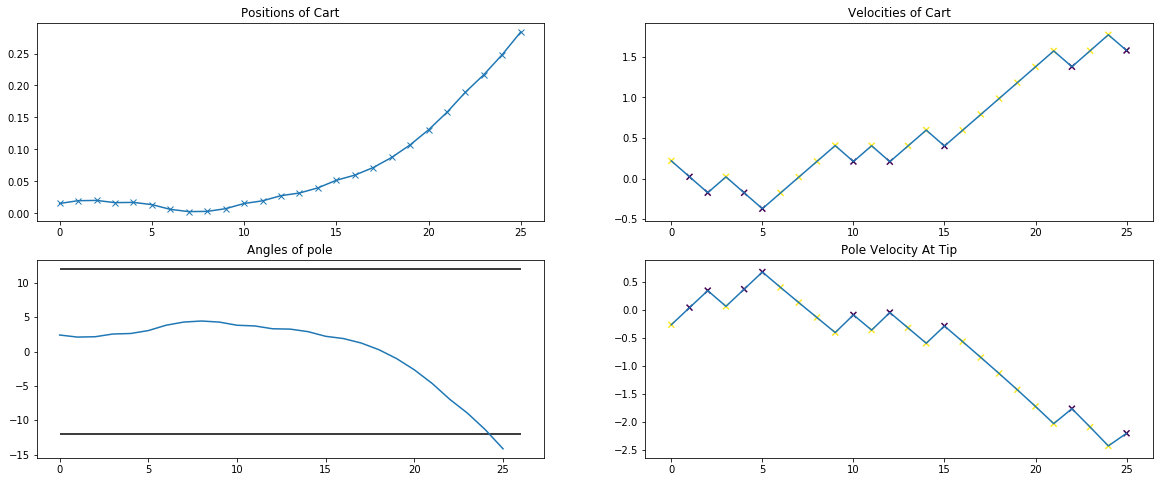

In [164]:
plot_episode(*get_random_episode())

In [16]:
# Try running environment with random actions
env.reset()
reward_sum = 0
num_games = 200
num_game = 0
reward_sums = []
print("Rewards sum per episode: ", end='')
while num_game < num_games:
#     env.render()
    observation, reward, done, _ = env.step(env.action_space.sample())
    reward_sum += reward
    if done:
        print(reward_sum, end=' ')
        reward_sums.append(reward_sum)
        reward_sum = 0
        num_game += 1
        env.reset()
print()
print('Average reward sum:', np.array(reward_sums).mean())

Rewards sum per episode: 30.0 14.0 26.0 23.0 12.0 36.0 18.0 43.0 11.0 24.0 14.0 12.0 15.0 10.0 22.0 26.0 20.0 12.0 30.0 21.0 10.0 17.0 18.0 58.0 21.0 21.0 15.0 24.0 16.0 14.0 34.0 13.0 20.0 23.0 14.0 21.0 9.0 18.0 83.0 28.0 21.0 27.0 11.0 14.0 11.0 49.0 20.0 11.0 30.0 13.0 27.0 16.0 18.0 26.0 18.0 13.0 48.0 22.0 43.0 14.0 17.0 64.0 16.0 20.0 43.0 29.0 51.0 39.0 15.0 23.0 30.0 11.0 33.0 16.0 13.0 15.0 12.0 27.0 15.0 14.0 15.0 63.0 14.0 12.0 20.0 9.0 29.0 25.0 12.0 11.0 47.0 25.0 18.0 23.0 12.0 14.0 14.0 76.0 19.0 24.0 12.0 13.0 16.0 14.0 20.0 18.0 39.0 14.0 29.0 56.0 12.0 13.0 18.0 24.0 12.0 22.0 35.0 17.0 22.0 20.0 23.0 18.0 13.0 14.0 10.0 16.0 26.0 20.0 20.0 17.0 21.0 21.0 13.0 29.0 16.0 17.0 14.0 21.0 23.0 80.0 24.0 16.0 17.0 19.0 18.0 36.0 22.0 13.0 21.0 18.0 41.0 19.0 18.0 18.0 17.0 60.0 32.0 13.0 14.0 19.0 23.0 10.0 12.0 25.0 15.0 15.0 22.0 19.0 16.0 25.0 41.0 18.0 13.0 13.0 64.0 13.0 18.0 14.0 19.0 16.0 36.0 18.0 29.0 10.0 13.0 20.0 19.0 26.0 32.0 23.0 30.0 12.0 30.0 30.0 15.0 13

## Setting up a Neural Network agent
We will use a policy neural network that takes observations, passes them through a single hidden layer and then produces a probability of choosing a left/right movement.

In [104]:
import keras.layers as layers
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K
from keras.initializers import glorot_uniform
from keras.losses import categorical_crossentropy, binary_crossentropy

def get_policy_model(env, hidden_layer_neurons, lr):
    dimen = env.reset().shape
    num_actions = env.action_space.n
    inp = layers.Input(shape=dimen,name="input_x")
    adv = layers.Input(shape=[1], name="advantages")
    x = layers.Dense(hidden_layer_neurons, 
                     activation="relu", 
                     use_bias=False,
                     kernel_initializer=glorot_uniform(seed=42),
                     name="dense_1")(inp)
    out = layers.Dense(num_actions, 
                       activation="softmax", 
                       kernel_initializer=glorot_uniform(seed=42),
                       use_bias=False,
                       name="out")(x)

    def custom_loss(y_true, y_pred):
        # actual: 0 predict: 0 -> log(0 * (0 - 0) + (1 - 0) * (0 + 0)) = -inf
        # actual: 1 predict: 1 -> log(1 * (1 - 1) + (1 - 1) * (1 + 1)) = -inf
        # actual: 1 predict: 0 -> log(1 * (1 - 0) + (1 - 1) * (1 + 0)) = 0
        # actual: 0 predict: 1 -> log(0 * (0 - 1) + (1 - 0) * (0 + 1)) = 0
        log_lik = K.log(y_true * (y_true - y_pred) + (1 - y_true) * (y_true + y_pred))
        # log_lik = categorical_crossentropy(y_true, y_pred)
        # log_lik = y_true*K.log(y_pred) + (1 - y_true) * K.log((1-y_pred))
        return K.mean(log_lik * adv, keepdims=True)
        
    model_train = Model(inputs=[inp, adv], outputs=out)
    model_train.compile(loss=custom_loss, optimizer=Adam(lr))
    model_predict = Model(inputs=[inp], outputs=out)
    return model_train, model_predict

In [100]:
def discount_rewards(r, gamma=0.99):
    """Takes 1d float array of rewards and computes discounted reward
    e.g. f([1, 1, 1], 0.99) -> [2.9701, 1.99, 1]
    """
    prior = 0
    out = []
    for val in r:
        new_val = val + prior * gamma
        out.append(new_val)
        prior = new_val
    return np.array(out[::-1])

In [101]:
# Constants defining our neural network
hidden_layer_neurons = 8
gamma = .99
dimen = len(env.reset())
print_every = 100
batch_size = 50
render = False
lr = 1e-2
goal = 190

In [20]:
# See our trained bot in action
def score_model(model, num_tests, render=False):
    scores = []    
    for num_test in range(num_tests):
        observation = env.reset()
        reward_sum = 0
        while True:
            if render:
                env.render()

            state = np.reshape(observation, [1, dimen])
            predict = model.predict([state])[0]
            action = np.argmax(predict)
            observation, reward, done, _ = env.step(action)
            reward_sum += reward
            if done:
                break
        scores.append(reward_sum)
    env.close()
    return np.mean(scores)

In [21]:
model_train, model_predict = get_policy_model(env, hidden_layer_neurons, lr)
model_predict.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
out (Dense)                  (None, 2)                 16        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Inicializaciones
num_episodes = 10000


num_actions = env.action_space.n

discounted_rewards = np.empty(0).reshape(0,1)
num_episode = 0

losses = []

In [23]:
def run_episode(gamma=gamma, num_actions=num_actions):
    states = np.empty(0).reshape(0,dimen)
    actions = np.empty(0).reshape(0,1)
    rewards = np.empty(0).reshape(0,1)
    reward_sum = 0
    observation = env.reset()
    done = False
    while not done:
        # Append the observations to our batch
        state = np.reshape(observation, [1, dimen])

        predict = model_predict.predict([state])[0]
        action = np.random.choice(range(num_actions),p=predict)

        # Append the observations and outputs for learning
        states = np.vstack([states, state])
        actions = np.vstack([actions, action])

        # Determine the oucome of our action
        observation, reward, done, _ = env.step(action)
        reward_sum += reward
        rewards = np.vstack([rewards, reward])
    return states, actions, rewards, reward_sum, discount_rewards(rewards, gamma)

# Ejemplo primer episodio

In [24]:
discounted_rewards = np.empty(0).reshape(0,1)

In [25]:
states, actions, rewards, reward_sum, discounted_rewards_episode = run_episode()

In [26]:
states.shape, actions.shape, rewards.shape, reward_sum, gamma

((11, 4), (11, 1), (11, 1), 11.0, 0.99)

In [27]:
discounted_rewards_episode.reshape(-1)

array([10.46617457,  9.5617925 ,  8.64827525,  7.72553056,  6.79346521,
        5.85198506,  4.90099501,  3.940399  ,  2.9701    ,  1.99      ,
        1.        ])

In [28]:
discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])

In [29]:
discounted_rewards.shape

(11, 1)

# Segundo episodio

In [30]:
states, actions, rewards, reward_sum, discounted_rewards_episode = run_episode()

In [31]:
states.shape, actions.shape, rewards.shape, reward_sum, gamma

((10, 4), (10, 1), (10, 1), 10.0, 0.99)

In [32]:
discounted_rewards_episode.reshape(-1)

array([9.5617925 , 8.64827525, 7.72553056, 6.79346521, 5.85198506,
       4.90099501, 3.940399  , 2.9701    , 1.99      , 1.        ])

In [33]:
discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])

In [34]:
discounted_rewards.shape

(21, 1)

In [35]:
discounted_rewards_unbiased = discounted_rewards - discounted_rewards.mean()
discounted_rewards_normalized = discounted_rewards_unbiased / discounted_rewards_unbiased.std()

In [36]:
discounted_rewards_normalized.reshape(-1)

array([ 1.69486276,  1.38100381,  1.06397457,  0.74374301,  0.4202768 ,
        0.09354324, -0.23649065, -0.56985821, -0.90659313, -1.24672941,
       -1.59030141,  1.38100381,  1.06397457,  0.74374301,  0.4202768 ,
        0.09354324, -0.23649065, -0.56985821, -0.90659313, -1.24672941,
       -1.59030141])

In [37]:
actions = actions.reshape(-1).astype(int)

In [38]:
actions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [39]:
actions_train = np.zeros([len(actions), num_actions])
actions_train[np.arange(len(actions)), actions] = 1

In [40]:
actions_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

# Genero un batch de datos para despues entrenar la red

In [43]:
batch_size

50

In [44]:
def get_batch_data(batch_size=batch_size):
    batch_states = np.empty(0).reshape(0,dimen)
    batch_actions = np.empty(0).reshape(0,1)
    discounted_rewards = np.empty(0).reshape(0,1)
    for i in range(batch_size):
        states, actions, _, _, discounted_rewards_episode = run_episode()
        discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
        batch_states = np.vstack([batch_states, states]) 
        batch_actions = np.vstack([batch_actions, actions]) 
    return batch_states, batch_actions, discounted_rewards

In [45]:
batch_states, batch_actions, discounted_rewards = get_batch_data()

In [46]:
batch_states.shape, batch_actions.shape, discounted_rewards.shape

((1070, 4), (1070, 1), (1070, 1))

In [47]:
discounted_rewards -= discounted_rewards.mean()
discounted_rewards /= discounted_rewards.std()
discounted_rewards = discounted_rewards.squeeze()
batch_actions = batch_actions.squeeze().astype(int)

actions_train = np.zeros([len(batch_actions), num_actions])
actions_train[np.arange(len(batch_actions)), batch_actions] = 1

In [48]:
discounted_rewards.shape, batch_actions.shape, actions_train.shape, batch_states.shape

((1070,), (1070,), (1070, 2), (1070, 4))

In [49]:
model_train.evaluate([batch_states, discounted_rewards], actions_train, verbose=1)

1070/1070 [==============================] - 0s 22us/step


0.05804838265214011

In [50]:
training_episodes = 5
for i in range(training_episodes):
    loss = model_train.train_on_batch([batch_states, discounted_rewards], actions_train)
    print(loss)

Instructions for updating:
Use tf.cast instead.
0.05804837
0.04638788
0.035573903
0.025581596
0.016413702


# Train full model

In [111]:
def get_policy_model(env, hidden_layer_neurons, lr):
    dimen = env.reset().shape
    num_actions = env.action_space.n
    inp = layers.Input(shape=dimen,name="input_x")
    adv = layers.Input(shape=[1], name="advantages")
    x = layers.Dense(hidden_layer_neurons, 
                     activation="relu", 
                     use_bias=False,
                     kernel_initializer=glorot_uniform(seed=42),
                     name="dense_1")(inp)
    out = layers.Dense(num_actions, 
                       activation="softmax", 
                       kernel_initializer=glorot_uniform(seed=42),
                       use_bias=False,
                       name="out")(x)

    def custom_loss(y_true, y_pred):
        # actual: 0 predict: 0 -> log(0 * (0 - 0) + (1 - 0) * (0 + 0)) = -inf
        # actual: 1 predict: 1 -> log(1 * (1 - 1) + (1 - 1) * (1 + 1)) = -inf
        # actual: 1 predict: 0 -> log(1 * (1 - 0) + (1 - 1) * (1 + 0)) = 0
        # actual: 0 predict: 1 -> log(0 * (0 - 1) + (1 - 0) * (0 + 1)) = 0
        # log_lik = K.log(y_true * (y_true - y_pred) + (1 - y_true) * (y_true + y_pred))
        log_lik = K.log(K.square(y_true - y_pred) + K.epsilon())
        return K.mean(log_lik * adv, keepdims=True)
        
    model_train = Model(inputs=[inp, adv], outputs=out)
    model_train.compile(loss=custom_loss, optimizer=Adam(lr))
    model_predict = Model(inputs=[inp], outputs=out)
    return model_train, model_predict

In [112]:
def train_full_model(max_num_episodes = 10000, batch_size = 50, training_epochs = 5, goal = 200, reset_model=True, verbose_period = 2):
    losses=[]
    if reset_model:
        # Get model
        model_train, model_predict = get_policy_model(env, hidden_layer_neurons, lr)
    num_episode = 0
    i = 0
    while num_episode < max_num_episodes:
        # Get batch_size episodes for training
        batch_states, batch_actions, discounted_rewards = get_batch_data(batch_size)
        # format data for NN
        discounted_rewards -= discounted_rewards.mean()
        discounted_rewards /= discounted_rewards.std()
        discounted_rewards = discounted_rewards.squeeze()
        batch_actions = batch_actions.squeeze().astype(int)
        actions_train = np.zeros([len(batch_actions), num_actions])
        actions_train[np.arange(len(batch_actions)), batch_actions] = 1
        for _ in range(training_epochs):
            loss = model_train.train_on_batch([batch_states, discounted_rewards], actions_train)
            losses.append(loss)
        score = score_model(model_predict,10)
        if (i%verbose_period) == 0:
            print(num_episode, loss, score)
        if score >= goal:
            print("Solved in {} episodes!".format(num_episode))
            break
        num_episode+=batch_size
        i+=1
    return losses

In [113]:
losses = train_full_model(training_epochs = 1)

0 0.020771468 12.5
100 0.00020552882 9.3
200 -0.0075864 9.1
300 0.0015345047 77.8
400 -0.012698522 89.2
500 -0.0008012433 81.9
600 -0.0017889469 99.4
700 -0.009999931 116.1
800 -0.008741073 128.1
900 0.007759542 124.9
1000 -0.0029668694 113.4
1100 -0.011697472 124.3
1200 -0.01634808 118.3
1300 -0.01331014 135.1
1400 -0.014434876 128.6
1500 -0.010097538 158.1
1600 -0.01770446 157.9
1700 -0.028305128 178.9
1800 -0.005949236 179.2
1900 -0.013449854 166.9
2000 -0.0105366 162.7
2100 -0.00581168 175.9
2200 -0.002210335 170.1
2300 0.00051967683 162.4
2400 -0.009103365 141.8
2500 -0.014447034 151.1
2600 -0.009666323 157.3
2700 -0.010214572 158.2
2800 -0.01268941 168.8
2900 -0.004065208 144.1
3000 -0.009582371 172.9
3100 -0.009974086 169.5
3200 -0.008960151 146.8
3300 -0.0073781153 158.4
3400 -0.016671617 166.5
3500 -0.012471499 155.4
3600 -0.0109524885 166.0
3700 -0.0072073494 159.8
3800 -0.008014138 157.7
3900 -0.012604058 171.3
4000 -0.018112516 153.7
4100 -0.0066214893 140.2
4200 0.00282552

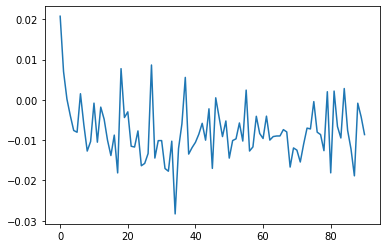

In [114]:
plt.plot(losses)

In [165]:
def get_model_episode(model, dimen=4):
    done = False
    observation = env.reset()
    positions_of_cart = []
    velocities_of_cart = []
    angles_of_pole = []
    rotation_rates_of_pole = []
    actions = []
    while not done:
        state = np.reshape(observation, [1, dimen])
        predict = model.predict([state])[0]
        action = np.argmax(predict)
        actions.append(action)
        observation, reward, done, _ = env.step(action)
        (position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole) = observation
        positions_of_cart.append(position_of_cart)
        velocities_of_cart.append(velocity_of_cart)
        angles_of_pole.append(angle_of_pole)
        rotation_rates_of_pole.append(rotation_rate_of_pole)
    return positions_of_cart, velocities_of_cart, angles_of_pole, rotation_rates_of_pole, actions

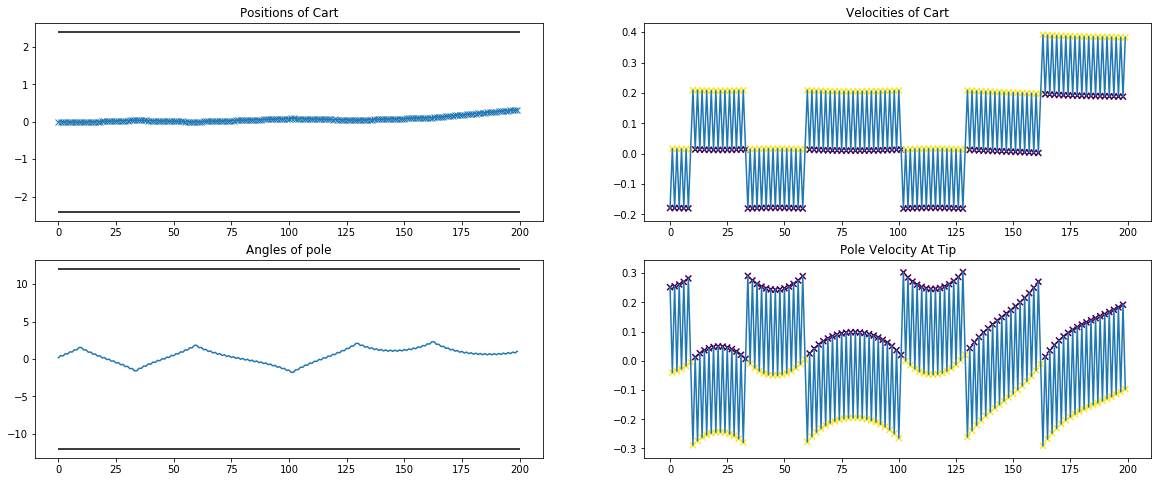

In [171]:
plot_episode(*get_model_episode(model_predict), show_pos_thres=True)

In [57]:
model_train, model_predict = get_policy_model(env, hidden_layer_neurons, lr)
model_predict.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
out (Dense)                  (None, 2)                 16        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [58]:
training_episodes = 3
reward_sum = 0

num_actions = env.action_space.n

# Placeholders for our observations, outputs and rewards
states = np.empty(0).reshape(0,dimen)
actions = np.empty(0).reshape(0,1)
rewards = np.empty(0).reshape(0,1)
discounted_rewards = np.empty(0).reshape(0,1)

# Setting up our environment
observation = env.reset()

num_episode = 0

losses = []

while num_episode < num_episodes:
    # Append the observations to our batch
    state = np.reshape(observation, [1, dimen])
    
    predict = model_predict.predict([state])[0]
    action = np.random.choice(range(num_actions),p=predict)
    
    # Append the observations and outputs for learning
    states = np.vstack([states, state])
    actions = np.vstack([actions, action])
    
    # Determine the oucome of our action
    observation, reward, done, _ = env.step(action)
    reward_sum += reward
    rewards = np.vstack([rewards, reward])
    
    if done:
        # Determine standardized rewards
        discounted_rewards_episode = discount_rewards(rewards, gamma)       
        discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
        
        rewards = np.empty(0).reshape(0,1)

        if (num_episode + 1) % batch_size == 0:
            discounted_rewards -= discounted_rewards.mean()
            discounted_rewards /= discounted_rewards.std()
            discounted_rewards = discounted_rewards.squeeze()
            actions = actions.squeeze().astype(int)
           
            actions_train = np.zeros([len(actions), num_actions])
            actions_train[np.arange(len(actions)), actions] = 1
            for i in range(training_episodes):
                        loss = model_train.train_on_batch([states, discounted_rewards], actions_train)
            losses.append(loss)

            # Clear out game variables
            states = np.empty(0).reshape(0,dimen)
            actions = np.empty(0).reshape(0,1)
            discounted_rewards = np.empty(0).reshape(0,1)


        # Print periodically
        if (num_episode + 1) % print_every == 0:
            # Print status
            score = score_model(model_predict,10)
            print("Average reward for training episode {}: {:0.2f} Test Score: {:0.2f} Loss: {:0.6f} ".format(
                (num_episode + 1), reward_sum/print_every, 
                score,
                np.mean(losses[-print_every:])))
            
            if score >= goal:
                print("Solved in {} episodes!".format(num_episode))
                break
            reward_sum = 0
                
        num_episode += 1
        observation = env.reset()
        

Average reward for training episode 100: 22.85 Test Score: 11.60 Loss: 0.013788 
Average reward for training episode 200: 25.90 Test Score: 81.30 Loss: 0.004468 
Average reward for training episode 300: 30.81 Test Score: 85.80 Loss: 0.002039 
Average reward for training episode 400: 28.31 Test Score: 89.60 Loss: 0.001466 
Average reward for training episode 500: 26.01 Test Score: 78.00 Loss: 0.001073 
Average reward for training episode 600: 28.37 Test Score: 63.40 Loss: 0.000152 
Average reward for training episode 700: 26.39 Test Score: 58.60 Loss: 0.000420 
Average reward for training episode 800: 27.99 Test Score: 83.00 Loss: 0.000166 


KeyboardInterrupt: 

In [ ]:
env.close()